In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/us-zip-codes-with-lat-and-long/zip_lat_long.csv


In [2]:
os.getcwd()

'/kaggle/working'

In [3]:
zips = pd.read_csv('../input/us-zip-codes-with-lat-and-long/zip_lat_long.csv')
print(zips.shape)
zips.head()
zipsmod = zips[(zips.LAT < 50) & (zips.LAT > 24) & (zips.LNG < -65) & (zips.LNG > -127)]
zipsmod.to_csv("zip48.csv")
print(zipsmod.shape)
zipsmod.head()

(33144, 3)
(32657, 3)


,ZIP,LAT,LNG
142,1001,42.062368,-72.625754
143,1002,42.364061,-72.458739
144,1003,42.389941,-72.524108
145,1005,42.418848,-72.106598
146,1007,42.279010,-72.400468


<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

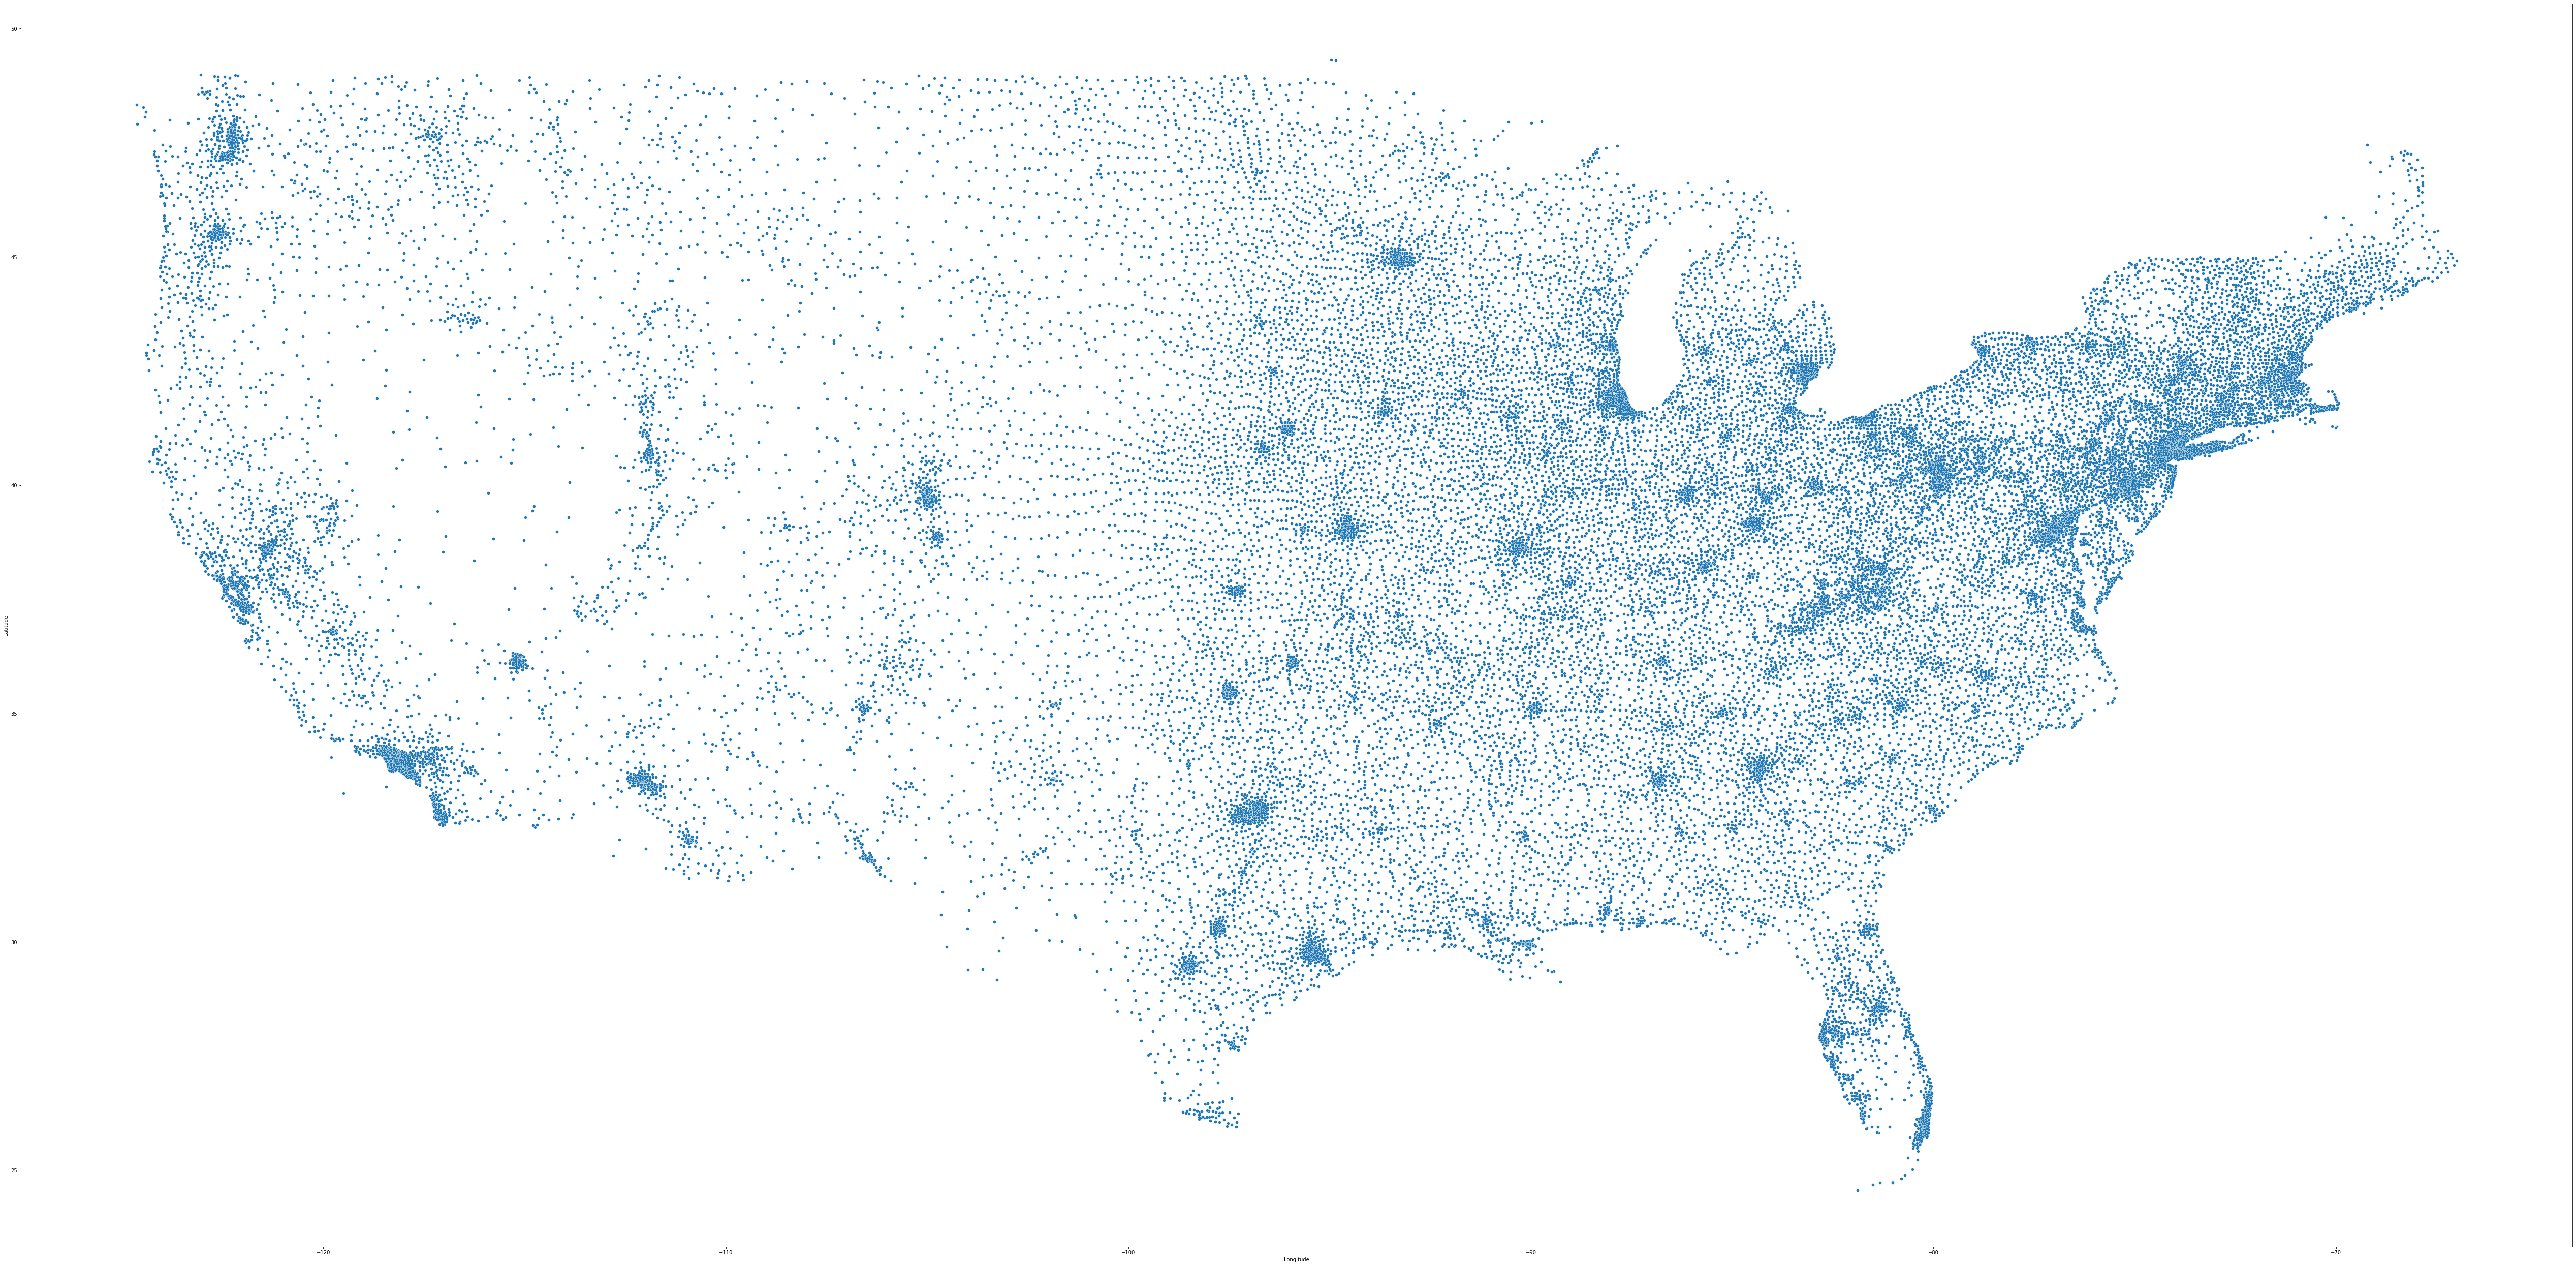

In [4]:
plt.figure(figsize=(90,45))
plt.xlabel("Longitude")
plt.ylabel("Latitude")
spl = sns.scatterplot(x=zipsmod.LNG, y=zipsmod.LAT)
spl.set(xlabel="Longitude", ylabel="Latitude")
spl

In [5]:
from sklearn.cluster import DBSCAN
scandb=DBSCAN(eps=.01,min_samples=2,metric='euclidean')
# create a data frame with the lat and long columns only
coordOnly = zipsmod.iloc[:,[1,2]]
print(coordOnly.shape)
coordOnly.head()
print(coordOnly.to_numpy())
# run DBSCAN on the coordinates
fitx = scandb.fit(coordOnly.to_numpy())
# once complete, each point has an integer corresponding to the cluster id, -1 if it's a noise point
label = fitx.labels_
labelframe = pd.DataFrame(label)
print("labelframe:",labelframe.describe())
print("first 40",label[0:40])
print("total clusters unless -1 is present",len(set(label)))

(32657, 2)
[[  42.062368  -72.625754]
 [  42.364061  -72.458739]
 [  42.389941  -72.524108]
 ...
 [  46.087207 -117.249856]
 [  46.190773 -117.127417]
 [  46.362367 -117.282597]]
labelframe:                   0
count  32657.000000
mean      -0.480418
std        6.095500
min       -1.000000
25%       -1.000000
50%       -1.000000
75%       -1.000000
max      111.000000
first 40 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1  0 -1 -1 -1 -1]
total clusters unless -1 is present 113


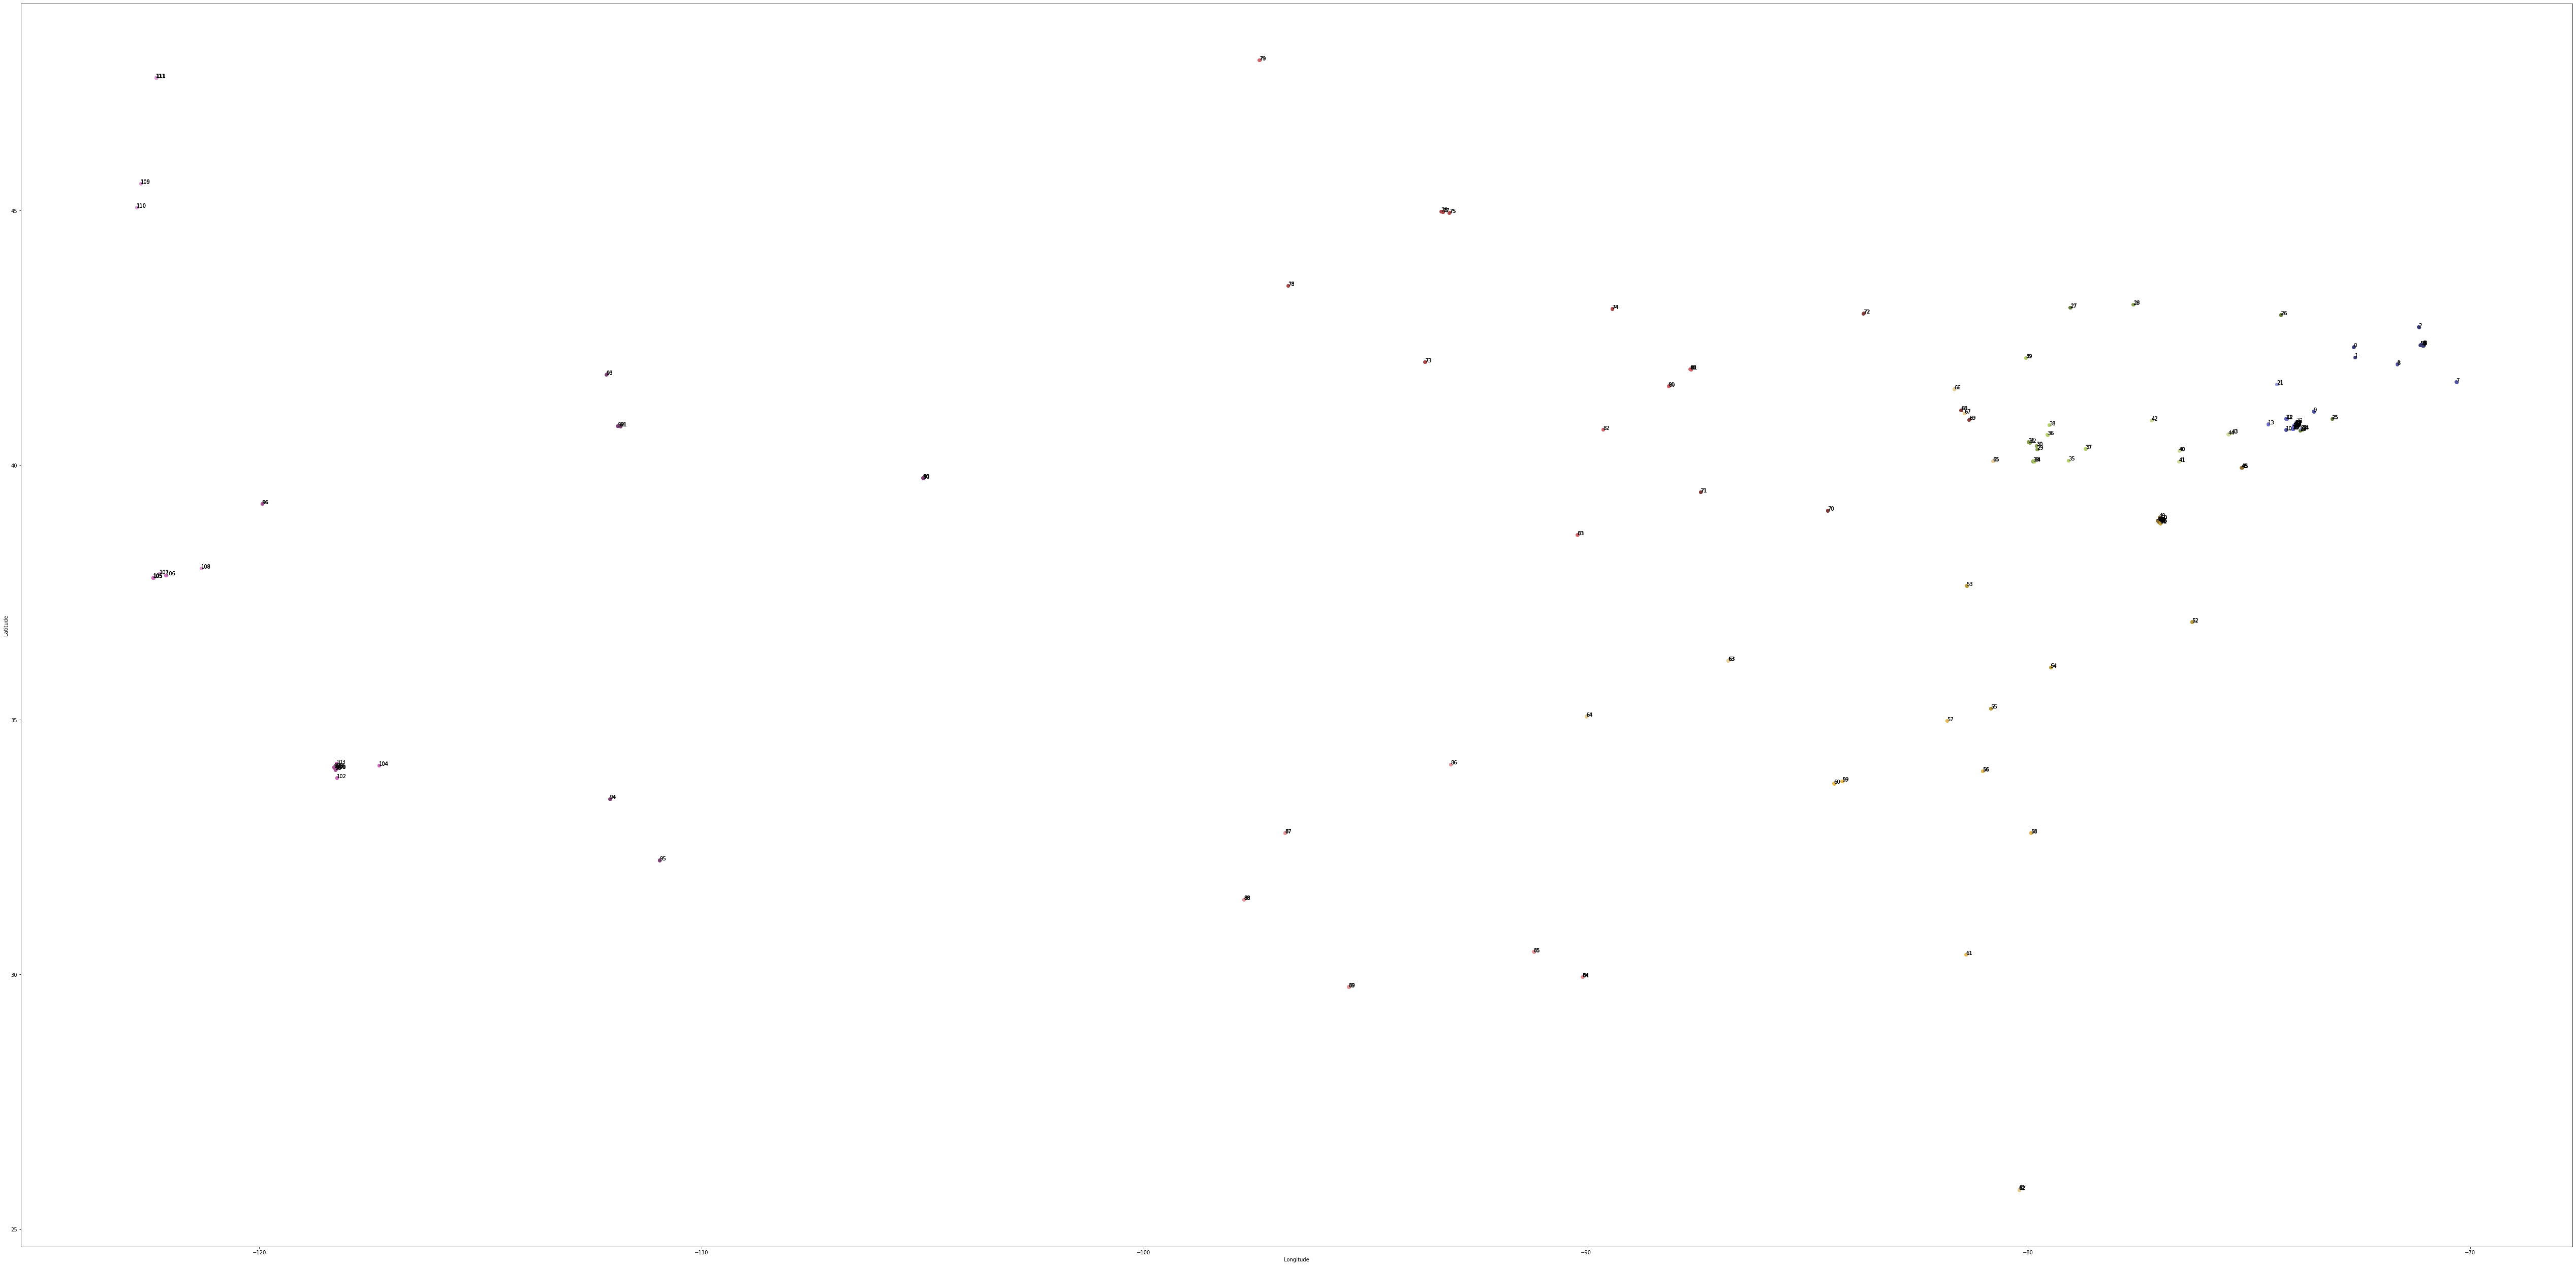

In [9]:
plt.figure(figsize=(90,45))
plt.xlabel("Longitude")
plt.ylabel("Latitude")
actualIndex = -1
#cmap = plt.get_cmap('Accent')
#cmap = plt.get_cmap('gist_ncar')
cmap = plt.get_cmap('tab20b')
#sliced = cmap(np.linspace(0, 1, len(set(label))))
for index, row in coordOnly.iterrows() :
    actualIndex += 1
    if -1 != label[actualIndex] :
        #clrstr = '#' + (format(label[actualIndex], '02x')) + (format(2*label[actualIndex] % 255, '02x')) + (format(3*label[actualIndex] % 255, '02x'))
        #plt.scatter(row.LNG, row.LAT, c=clrstr)
        #plt.scatter(row.LNG, row.LAT, c=label[actualIndex], cmap='Accent')
        plt.scatter(row.LNG, row.LAT, c=cmap(label[actualIndex]/112))
        #plt.scatter(row.LNG, row.LAT, c=sliced(label[actualIndex]))
        #plt.scatter(row.LNG, row.LAT, c='red')
        plt.annotate(label[actualIndex], (row.LNG, row.LAT))
#plt.colorbar()
plt.show()